In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
import astropy.units as u
from glob import glob

In [62]:
paths = glob('mdwarf_data/hlsp_*.fits')

files = [fits.getdata(path) for path in paths]
headers = [fits.getheader(path) for path in paths]

In [107]:
class LightCurve(object):
    def __init__(self, times, fluxes, name=None): 
        nans = np.isnan(times) | np.isnan(fluxes)
        self.times = times[~nans]
        self.fluxes = fluxes[~nans]/np.median(fluxes[~nans])
        self.name = name
    
    def plot(self, *args, **kwargs): 
        plt.scatter(self.times, self.fluxes, *args, **kwargs)
        plt.title(self.name)
        
    def plot_phase_folded(self, params, *args, **kwargs): 
        phase = ((self.times - params['epoch']) % params['period']) / params['period']
        phase[phase >= 0.5] -= 1
        plt.scatter(phase, self.fluxes, *args, **kwargs)
        plt.title(self.name)
        plt.ylim(*np.percentile(self.fluxes, [0.1, 99.9]))

In [108]:
lcs = [LightCurve(f['TIME'], f['PDCSAP_FLUX'], header['OBJECT']) for f, header in zip(files, headers)]

(0.95, 1.04)

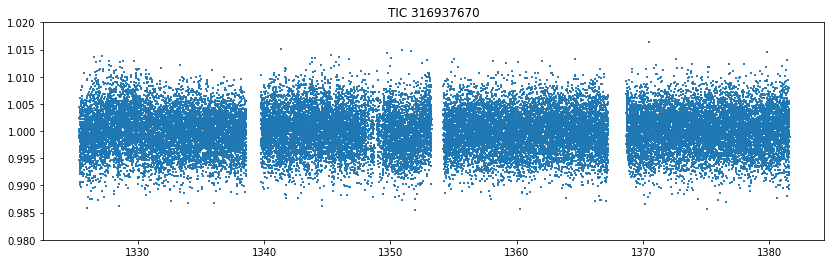

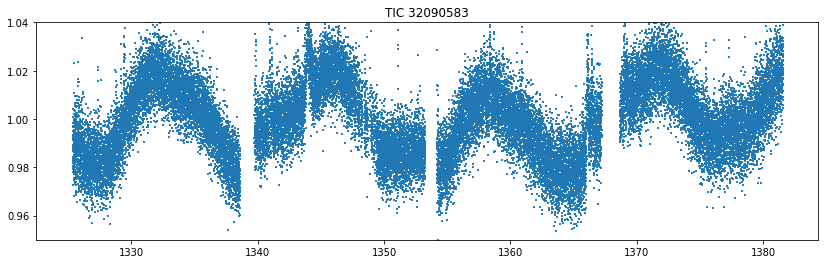

In [109]:
lightcurve_0 = LightCurve(np.concatenate([lcs[0].times, lcs[1].times]), np.concatenate([lcs[0].fluxes, lcs[1].fluxes]), lcs[0].name)
lightcurve_1 = LightCurve(np.concatenate([lcs[2].times, lcs[3].times]), np.concatenate([lcs[2].fluxes, lcs[3].fluxes]), lcs[2].name)

params_0 = dict(period=0.438335, epoch=1325.549828)
params_1 = dict(period=0.736283, epoch=1325.542781)

plt.figure(figsize=(14, 4))
lightcurve_1.plot(marker=',', s=1)
plt.ylim([0.98, 1.02])

plt.figure(figsize=(14, 4))
lightcurve_0.plot(marker=',', s=1)
#plt.ylim([0.98, 1.02])
plt.ylim([0.95, 1.04])